In [70]:
import numpy as np
from matplotlib import pyplot as plt
import copy
import matplotlib.animation as animation
from IPython.display import clear_output

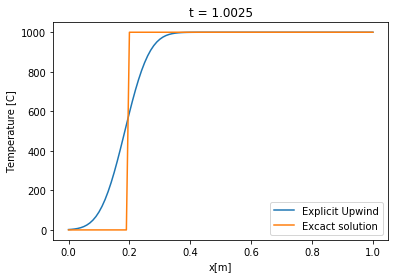

In [135]:
#Explicit upwind direction

DeltaX = 1 - 0
jmax = 101
dx = DeltaX / jmax
C = -0.5
c = -0.8
dt = C*dx/c
tEnd = 1
N = int(np.ceil(tEnd/dt))
x = np.linspace(0, 1, jmax)

u = np.zeros(jmax)
u[jmax-1] = 1000

plt.figure(1)

for n in range(N):
    nu = u*(1+C)
    nu[jmax-1] = 1000
    nu[:jmax-1] += -C*u[1:]
    u = nu
    y = 1000*np.heaviside(x-(n+1)*dt*c - 1, 1)
    plt.title(f"t = {np.round((n+1)*dt, 4)}")
    plt.xlabel("x[m]")
    plt.ylabel("Temperature [C]")
    plt.plot(x, u, label = "Explicit Upwind")
    plt.plot(x, y, label = "Excact solution")
    plt.legend()
    
    #plt.draw()
    plt.show()
    clear_output(wait=True)
    #plt.pause(0.01)
    
    
    

#plt.show()
    


#The scheme is stable, but somewhat inaccurate near the discontinuity

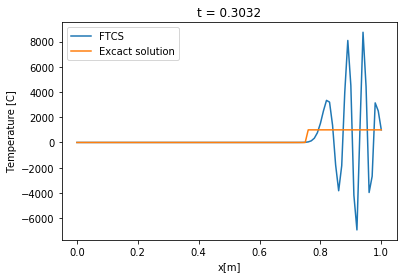

In [137]:
#FTCS

DeltaX = 1 - 0
jmax = 101
dx = DeltaX / jmax
C = -0.5
c = -0.8
dt = C*dx/c
tEnd = 0.3
N = int(np.ceil(tEnd/dt))
x = np.linspace(0, 1, jmax)

u = np.zeros(jmax)
u[jmax-1] = 1000

plt.figure(1)

for n in range(N):
    nu = copy.copy(u)
    nu[:jmax-1] += -C*u[1:]/2
    nu[1:] += C*u[:jmax-1]/2
    nu[jmax-1] = 1000
    u = nu
    
    y = 1000*np.heaviside(x-(n+1)*dt*c - 1, 1)
    plt.title(f"t = {np.round((n+1)*dt, 4)}")
    plt.xlabel("x[m]")
    plt.ylabel("Temperature [C]")
    plt.plot(x, u, label = "FTCS")
    plt.plot(x, y, label = "Excact solution")
    plt.legend()
    
    #plt.draw()
    plt.show()
    clear_output(wait=True)
#     plt.pause(0.5)
    
    
    

#plt.show()
    


#The scheme blows up as expected